<a href="https://colab.research.google.com/github/jigimmie/Aiffel_jigimmie/blob/main/test_notebook_house_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주택 가격 예측하기!

메인퀘스트에 오신 것을 환영합니다!

이번 퀘스트의 목표는 여러 특성들을 종합적으로 고려하여 가장 주택 가격을 잘 예측하는 회귀모델을 만드는 것입니다.

- 예측할 값(y): SalePrice
- 평가지표: RMSE

퀘스트 진행 방식:

1. Code 란에서 테스트 노트북을 Copy&Edit 하여 작업!
2. 테스트 노트북을 submit 하여 리더보드에 정상적으로 등록되는지 확인하기
3. 자유롭게 모델을 발전시켜 좋은 성적 거두기!
4. 정상적으로 submit하고, 다음 구글폼에 이름/노트북주소/닉네임 등록!!!
- https://docs.google.com/forms/d/e/1FAIpQLSc0kXVZ9PRLbjsxBysCSSYLDiU4Hd9DLTvFrCFep4HLZLbL8w/viewform?usp=header

예시 형식:
~~~
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
~~~

### 데이터 확인 및 불러오기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('../drive/MyDrive/aiffel_bootcamp/house_price/train.csv')

In [ ]:
test_df = pd.read_csv('../drive/MyDrive/aiffel_bootcamp/house_price/test.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

특성이 너무 많습니다! 어떻게 하면 좋을까요?

참고로 각각의 특성은 다음을 나타냅니다.

| 변수명               | 설명 (한국어)                         |
| ----------------- | -------------------------------- |
| **SalePrice**     | 주택의 판매 가격(달러). 예측해야 하는 타겟 변수     |
| **MSSubClass**    | 건물 등급(건물 종류 분류)                  |
| **MSZoning**      | 토지 용도 구분(일반적인 구역 분류)             |
| **LotFrontage**   | 도로에 접한 토지 길이 (피트 단위)             |
| **LotArea**       | 토지 면적 (평방 피트)                    |
| **Street**        | 도로 접근 방식                         |
| **Alley**         | 골목(후면 도로) 접근 방식                  |
| **LotShape**      | 토지의 전반적인 모양                      |
| **LandContour**   | 토지의 평탄도                          |
| **Utilities**     | 사용 가능한 공공시설(전기, 수도 등)            |
| **LotConfig**     | 토지 배치 형태                         |
| **LandSlope**     | 토지의 경사도                          |
| **Neighborhood**  | Ames 시 내의 물리적 위치(주변 지역)          |
| **Condition1**    | 주요 도로·철도에 대한 근접도                 |
| **Condition2**    | 두 번째 주요 도로·철도에 대한 근접도            |
| **BldgType**      | 주거 건물 유형 (단독, 다세대 등)             |
| **HouseStyle**    | 주택의 건축 양식                        |
| **OverallQual**   | 자재 및 마감 품질 종합 평가                 |
| **OverallCond**   | 주택의 전반적인 상태 평가                   |
| **YearBuilt**     | 최초 건축 연도                         |
| **YearRemodAdd**  | 리모델링/개조 연도                       |
| **RoofStyle**     | 지붕 스타일                           |
| **RoofMatl**      | 지붕 재료                            |
| **Exterior1st**   | 외장 마감재(주 재료)                     |
| **Exterior2nd**   | 외장 마감재(보조 재료, 2번째)               |
| **MasVnrType**    | 석조 베니어 타입                        |
| **MasVnrArea**    | 석조 베니어 면적 (평방 피트)                |
| **ExterQual**     | 외장재 품질 평가                        |
| **ExterCond**     | 외장재 상태 평가                        |
| **Foundation**    | 기초(Foundation) 유형                |
| **BsmtQual**      | 지하실 높이 평가                        |
| **BsmtCond**      | 지하실 상태 평가                        |
| **BsmtExposure**  | 지하실 외부 노출 여부(출입구/창문 등)           |
| **BsmtFinType1**  | 주요 지하실 마감 구역 유형                  |
| **BsmtFinSF1**    | 주요 지하실 마감 면적 (평방 피트)             |
| **BsmtFinType2**  | 보조 지하실 마감 구역 유형                  |
| **BsmtFinSF2**    | 보조 지하실 마감 면적 (평방 피트)             |
| **BsmtUnfSF**     | 미완성 지하실 면적 (평방 피트)               |
| **TotalBsmtSF**   | 지하실 전체 면적 (평방 피트)                |
| **Heating**       | 난방 시스템 종류                        |
| **HeatingQC**     | 난방 품질 및 상태                       |
| **CentralAir**    | 중앙 에어컨 설치 여부                     |
| **Electrical**    | 전기 시스템 종류                        |
| **1stFlrSF**      | 1층 면적 (평방 피트)                    |
| **2ndFlrSF**      | 2층 면적 (평방 피트)                    |
| **LowQualFinSF**  | 저품질 마감 공간 면적 (전체 층 합산)           |
| **GrLivArea**     | 지상(Above grade) 생활 공간 면적 (평방 피트) |
| **BsmtFullBath**  | 지하실 완비 욕실 수                      |
| **BsmtHalfBath**  | 지하실 반 욕실 수                       |
| **FullBath**      | 지상 완비 욕실 수                       |
| **HalfBath**      | 지상 반 욕실 수                        |
| **Bedroom**       | 지하실 제외 침실 수                      |
| **Kitchen**       | 주방 수                             |
| **KitchenQual**   | 주방 품질                            |
| **TotRmsAbvGrd**  | 지상 전체 방 개수 (욕실 제외)               |
| **Functional**    | 주택 기능성 평가                        |
| **Fireplaces**    | 벽난로 개수                           |
| **FireplaceQu**   | 벽난로 품질                           |
| **GarageType**    | 차고 위치(유형)                        |
| **GarageYrBlt**   | 차고 건축 연도                         |
| **GarageFinish**  | 차고 내부 마감 상태                      |
| **GarageCars**    | 차고 크기 (주차 가능 차량 수)               |
| **GarageArea**    | 차고 면적 (평방 피트)                    |
| **GarageQual**    | 차고 품질                            |
| **GarageCond**    | 차고 상태                            |
| **PavedDrive**    | 포장 진입로 여부                        |
| **WoodDeckSF**    | 목재 데크 면적 (평방 피트)                 |
| **OpenPorchSF**   | 오픈 현관 면적 (평방 피트)                 |
| **EnclosedPorch** | 밀폐된 현관 면적 (평방 피트)                |
| **3SsnPorch**     | 3계절용 현관 면적 (평방 피트)               |
| **ScreenPorch**   | 스크린 현관 면적 (평방 피트)                |
| **PoolArea**      | 수영장 면적 (평방 피트)                   |
| **PoolQC**        | 수영장 품질                           |
| **Fence**         | 울타리 품질                           |
| **MiscFeature**   | 기타 특수 기능                         |
| **MiscVal**       | 기타 기능의 금전적 가치                    |
| **MoSold**        | 판매 월                             |
| **YrSold**        | 판매 연도                            |
| **SaleType**      | 판매 유형                            |
| **SaleCondition** | 판매 조건                            |


In [ ]:
pd.set_option('display.max_columns', 80)

In [ ]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  968          20       RL          NaN     7390   Pave   NaN      IR1   
1  739          90       RL         60.0    10800   Pave   NaN      Reg   
2  696          20       RL         54.0    13811   Pave   NaN      IR1   
3  239          20       RL         93.0    12030   Pave   NaN      Reg   
4  891          50       RL         60.0     8064   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
2         Lvl    AllPub    Inside       Gtl       Timber       Norm   
3         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
4         Lvl    AllPub    Corner       Gtl        NAmes     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            7       1955   
1       Norm   Duplex     1Story            5            5       1987   
2       Norm     1Fam     1Story            6            6       1987   
3       Norm     1Fam     1Story            8            5       2007   
4       Norm     1Fam     1.5Fin            5            7       1949   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1955       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1          1988     Gable  CompShg     Plywood     Plywood        NaN   
2          1987     Gable  CompShg     HdBoard     HdBoard    BrkFace   
3          2007       Hip  CompShg     VinylSd     VinylSd    BrkFace   
4          2006     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       151.0        TA        TA     CBlock       TA       TA           No   
1         0.0        TA        TA     CBlock       Gd       Gd           Gd   
2        72.0        TA        TA     CBlock       Gd       Gd           No   
3       254.0        Ex        TA      PConc       Ex       TA           No   
4         0.0        TA        Gd     CBlock       TA       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         902          Unf           0        196         1098   
1          GLQ        1200          Unf           0          0         1200   
2          GLQ         980          LwQ          40         92         1112   
3          Unf           0          Unf           0       1694         1694   
4          Unf           0          Unf           0        672          672   

  Heating  ... CentralAir Electrical 1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA  ...          Y      SBrkr     1098         0             0   
1    GasA  ...          Y      SBrkr     1200         0             0   
2    GasA  ...          Y      SBrkr     1137         0             0   
3    GasA  ...          Y      SBrkr     1694         0             0   
4    GasA  ...          Y      SBrkr      672       252             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1098             1             0         1         0             3   
1       1200             3             0         3         0             3   
2       1137             1             0         2         0             2   
3       1694             0             0         2         0             3   
4        924             0             0         1         0             3   

   KitchenAbvGr  KitchenQual TotRmsAbvGrd  Functional Fireplaces  FireplaceQu  \
0             1           TA            6         Typ          0          NaN   
1             1           TA            5         Typ          0          NaN   
2             1           Gd            5         Typ          1           TA   
3             1           Gd            7         Typ          0  

In [ ]:
train_df.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  968          20       RL          NaN     7390   Pave   NaN      IR1   
1  739          90       RL         60.0    10800   Pave   NaN      Reg   
2  696          20       RL         54.0    13811   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
2         Lvl    AllPub    Inside       Gtl       Timber       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            7       1955   
1       Norm   Duplex     1Story            5            5       1987   
2       Norm     1Fam     1Story            6            6       1987   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1955       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1          1988     Gable  CompShg     Plywood     Plywood        NaN   
2          1987     Gable  CompShg     HdBoard     HdBoard    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       151.0        TA        TA     CBlock       TA       TA           No   
1         0.0        TA        TA     CBlock       Gd       Gd           Gd   
2        72.0        TA        TA     CBlock       Gd       Gd           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         902          Unf           0        196         1098   
1          GLQ        1200          Unf           0          0         1200   
2          GLQ         980          LwQ          40         92         1112   

  Heating  ... CentralAir Electrical 1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA  ...          Y      SBrkr     1098         0             0   
1    GasA  ...          Y      SBrkr     1200         0             0   
2    GasA  ...          Y      SBrkr     1137         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1098             1             0         1         0             3   
1       1200             3             0         3         0             3   
2       1137             1             0         2         0             2   

   KitchenAbvGr  KitchenQual TotRmsAbvGrd  Functional Fireplaces  FireplaceQu  \
0             1           TA            6         Typ          0          NaN   
1             1           TA            5         Typ          0          NaN   
2             1           Gd            5         Typ          1           TA   

  GarageType GarageYrBlt  GarageFinish GarageCars  GarageArea  GarageQual  \
0     Attchd      1955.0           Unf          1         260          TA   
1        NaN         NaN           NaN          0           0         NaN   
2     Attchd      1987.0           Unf          2         551          TA   

  GarageCond PavedDrive WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y          0            0              0          0   
1        NaN          Y        120            0              0          0   
2         TA          Y        125            0              0          0   

   ScreenPorch  PoolArea  PoolQC Fence MiscFeature MiscVal  MoSold  YrSold  \
0            0         0     NaN   NaN         NaN       0       7    2008   
1            0         0     NaN   NaN         NaN       0       3    2009   
2            0         0     NaN   NaN         NaN       0       7    2006   

   SaleType SaleCondition SalePrice  
0        WD        Normal    135000  
1        WD        Alloca    179000  
2        WD        Normal    176000  

[3 rows x 81 columns]

In [ ]:
print(train_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      218
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


**시각화**

In [ ]:
pd.set_option('display.max_rows', None)
print(train_df.isnull().sum())
pd.reset_option('display.max_rows')

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       218
LotArea             0
Street              0
Alley            1098
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        694
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           23
BsmtCond           23
BsmtExposure       24
BsmtFinType1       23
BsmtFinSF1          0
BsmtFinType2       24
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

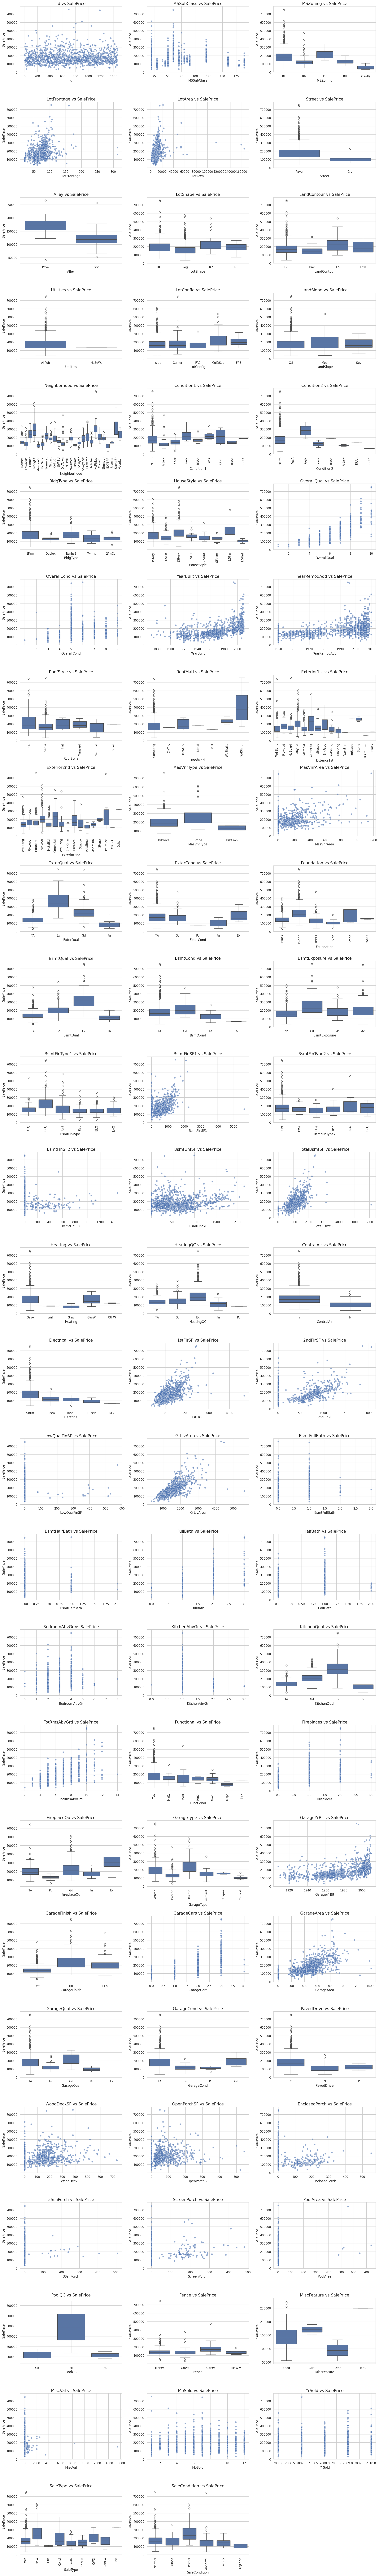

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

# 1. 시각화 스타일 및 폰트 설정 (필요에 따라 폰트 변경)
sns.set_theme(style="whitegrid")
plt.rc('font', family='Malgun Gothic') # 윈도우: Malgun Gothic, 맥: AppleGothic
plt.rc('axes', unicode_minus=False)    # 마이너스 기호 깨짐 방지

# 2. 타겟 변수 설정 및 Feature 리스트 추출
target = 'SalePrice'
features = [col for col in train_df.columns if col != target] # 타겟 변수 제외

# 3. 서브플롯(Subplot) 행/열 계산
n_cols = 3  # 한 줄에 3개씩 그리기
n_rows = math.ceil(len(features) / n_cols)

# 4. 전체 그래프 크기 설정 (행 개수에 따라 높이 자동 조절)
plt.figure(figsize=(20, 5 * n_rows))

# 5. 반복문으로 모든 변수 시각화 수행
for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i+1)

    try:
        # (A) 범주형 변수일 때 -> Boxplot
        if train_df[col].dtype == 'object' or train_df[col].dtype.name == 'category':
            sns.boxplot(x=col, y=target, data=train_df)

            # 카테고리가 너무 많으면 x축 라벨을 90도 회전
            if train_df[col].nunique() > 5:
                plt.xticks(rotation=90)

        # (B) 수치형 변수일 때 -> Scatterplot
        else:
            # 투명도(alpha)를 주어 데이터가 뭉친 곳을 확인하기 쉽게 함
            sns.scatterplot(x=col, y=target, data=train_df, alpha=0.6)

            # (선택사항) 추세선도 같이 보고 싶으면 아래 주석 해제 후 위 코드 주석 처리
            # sns.regplot(x=col, y=target, data=train_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

        plt.title(f'{col} vs {target}', fontsize=15)

    except Exception as e:
        print(f"Error plotting {col}: {e}")

plt.tight_layout()
plt.show()

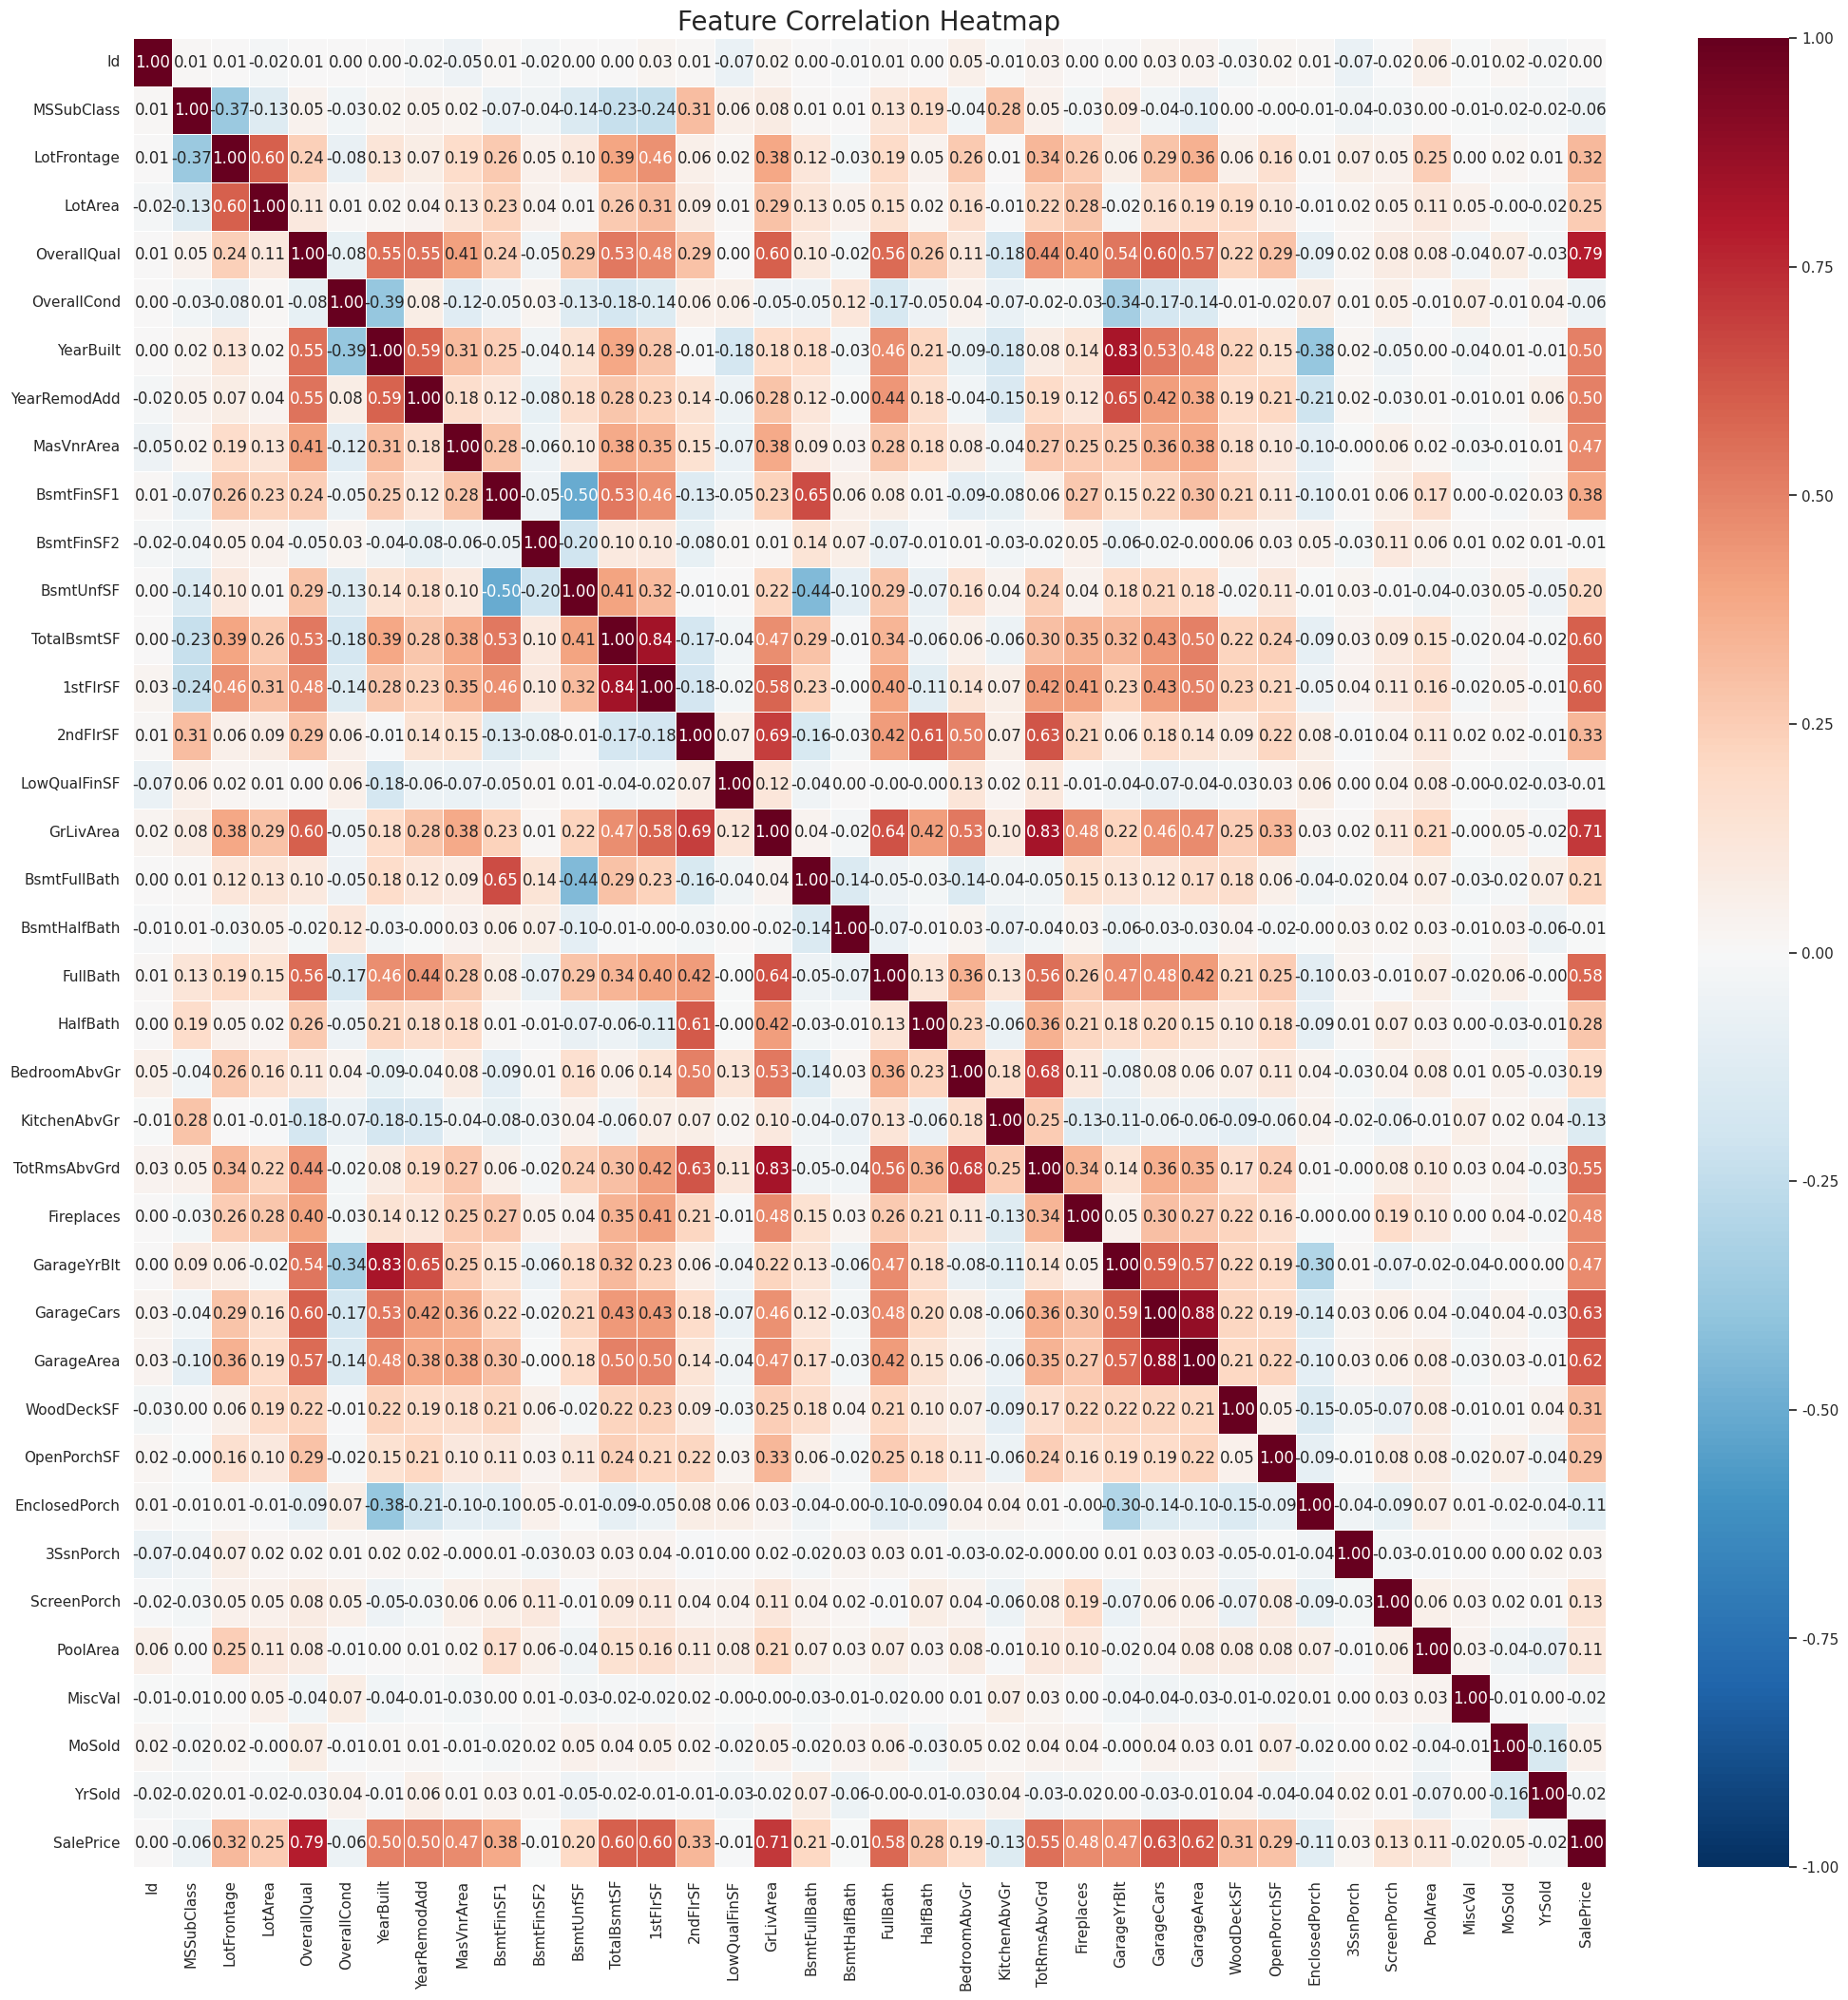

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 수치형 변수만 선택 (상관관계는 수치형 데이터만 계산 가능합니다)
numeric_train_df = train_df.select_dtypes(include=['number'])

# 2. 상관계수 행렬 계산
corr_matrix = numeric_train_df.corr()

# 3. 그래프 크기 설정
# 변수가 많으면 숫자가 겹쳐 보일 수 있으므로 크기를 넉넉하게 잡습니다.
plt.figure(figsize=(25, 25))

# 4. 히트맵 그리기
sns.heatmap(data=corr_matrix,
            annot=True,      # 칸 안에 숫자 표시
            fmt='.2f',       # 소수점 둘째 자리까지 표시
            cmap='RdBu_r',   # 색상 테마 (빨강: 양의 상관관계, 파랑: 음의 상관관계)
            vmin=-1, vmax=1, # 색상 범위를 -1에서 1로 고정
            linewidths=.5)   # 칸 사이 간격 구분선

plt.title('Feature Correlation Heatmap', fontsize=20)
plt.show()

상대적으로 상관관계가 높은 변수들을 정리해봤습니다.


*   TotRmsAbvGrd - GrlivArea: 83
*   GarageYrBuilt - YearBuilt: 83
*   GarageArea - GarargeCars:88
*   1stFlrSF - TotalBsmtSF : 84

<타겟피처와의 상관관계가 높은 피처>
1. OverallQual - 79
2. GrLivArea - 71



### 전처리

전처리에서 고민해야 할 것은 많습니다.

1. 결측치
2. 이상치

결측치는 처리하지 않으면 학습 자체가 불가할 수 있기 때문에, 최소한의 전처리로 결측치를 처리하겠습니다.

여러분들이라면 어떻게 결측치를 처리하면 좋을지 고민해보세요!

In [ ]:
train_df['SaleType'].unique()

array(['WD', 'New', 'Oth', 'ConLI', 'COD', 'ConLD', 'CWD', 'ConLw', 'Con'],
      dtype=object)

In [ ]:
isnull_series= train_df.isnull().sum()
print(isnull_series[isnull_series > 0].sort_values(ascending=False))

PoolQC          1162
MiscFeature     1120
Alley           1098
Fence            941
MasVnrType       694
FireplaceQu      545
LotFrontage      218
GarageType        69
GarageYrBlt       69
GarageFinish      69
GarageQual        69
GarageCond        69
BsmtExposure      24
BsmtFinType2      24
BsmtQual          23
BsmtCond          23
BsmtFinType1      23
MasVnrArea         8
Electrical         1
dtype: int64


In [ ]:
#FirePlaceQu까지는 제거.
train_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
#나머지 수치형은 median으로 대체
train_df = train_df.fillna(train_df.median(numeric_only=True))


In [ ]:
# 1. 모든 컬럼의 결측치 비율 계산
null_ratios = train_df.isnull().mean()

# 2. 결측치 비율이 0보다 큰(결측치가 존재하는) 컬럼만 필터링
null_column_mean = null_ratios[null_ratios > 0]

# 3. 결과 출력 (비율 확인)
print(null_column_mean)

# 4. 해당 컬럼들의 데이터 타입 확인
print(train_df[null_column_mean.index].dtypes)

MasVnrType      0.594178
BsmtQual        0.019692
BsmtCond        0.019692
BsmtExposure    0.020548
BsmtFinType1    0.019692
BsmtFinType2    0.020548
Electrical      0.000856
GarageType      0.059075
GarageFinish    0.059075
GarageQual      0.059075
GarageCond      0.059075
dtype: float64
MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [ ]:
#59%의 결측치를 가지는 MasVnrType은 제거함
train_df.drop('MasVnrType', axis=1, inplace=True)

In [ ]:

# 범주형 → 최빈값
for col in train_df.select_dtypes(include="object"):
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# 피처 엔지니어링

In [ ]:
train_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL         69.0     7390   Pave      IR1         Lvl   
1          90       RL         60.0    10800   Pave      Reg         Lvl   
2          20       RL         54.0    13811   Pave      IR1         Lvl   
3          20       RL         93.0    12030   Pave      Reg         Lvl   
4          50       RL         60.0     8064   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam   
1    AllPub    Inside       Gtl      Edwards       Norm       Norm   Duplex   
2    AllPub    Inside       Gtl       Timber       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl      NridgHt       Norm       Norm     1Fam   
4    AllPub    Corner       Gtl        NAmes     Artery       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            5            7       1955          1955       Hip   
1     1Story            5            5       1987          1988     Gable   
2     1Story            6            6       1987          1987     Gable   
3     1Story            8            5       2007          2007       Hip   
4     1.5Fin            5            7       1949          2006     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation  \
0  CompShg     Wd Sdng     Wd Sdng       151.0        TA        TA     CBlock   
1  CompShg     Plywood     Plywood         0.0        TA        TA     CBlock   
2  CompShg     HdBoard     HdBoard        72.0        TA        TA     CBlock   
3  CompShg     VinylSd     VinylSd       254.0        Ex        TA      PConc   
4  CompShg     MetalSd     MetalSd         0.0        TA        Gd     CBlock   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       TA       TA           No          ALQ         902          Unf   
1       Gd       Gd           Gd          GLQ        1200          Unf   
2       Gd       Gd           No          GLQ         980          LwQ   
3       Ex       TA           No          Unf           0          Unf   
4       TA       TA           Mn          Unf           0          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           0        196         1098    GasA        TA          Y      SBrkr   
1           0          0         1200    GasA        TA          Y      SBrkr   
2          40         92         1112    GasA        Gd          Y      SBrkr   
3           0       1694         1694    GasA        Ex          Y      SBrkr   
4           0        672          672    GasA        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0      1098         0             0       1098             1             0   
1      1200         0             0       1200             3             0   
2      1137         0             0       1137             1             0   
3      1694         0             0       1694             0             0   
4       672       252             0        924             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         1         0             3             1          TA             6   
1         3         0             3             1          TA             5   
2         2         0             2             1          Gd             5   
3         2         0             3             1          Gd             7   
4         1         0             3             1          TA             6   

  Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  \
0        Typ           0     Attchd       1955.0          Unf           1   
1        Typ           0     Attchd       1980.0          Unf           0   
2        Typ  

In [ ]:
#1층, 2층 면적 제거(GrlivArea에 지상 면적이 이미 포함됨)
train_df.drop(['1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [ ]:
#전체 욕실 개수 합치기
# 1. Total_Bath 파생 변수 생성
# 공식: 지상/지하 Full Bath (1점) + 지상/지하 Half Bath (0.5점)
train_df['Total_Bath'] = (train_df['FullBath'] + train_df['BsmtFullBath'] +
                          0.5 * (train_df['HalfBath'] + train_df['BsmtHalfBath']))

# 2. 기존 변수 삭제 (Drop)
# Total_Bath가 이 정보들을 모두 포함하고 있으므로 과감하게 삭제
cols_to_drop = ['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath']
train_df = train_df.drop(columns=cols_to_drop)


In [ ]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Sal

In [ ]:
#집이 팔렸을때 나이, 팔렸을때 리모델링한지 몇년 됐는지
train_df['house_age'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['remod_age'] = train_df['YrSold'] - train_df['YearRemodAdd']

In [ ]:
train_df.drop(['YrSold', 'YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

In [ ]:
#garage area만 살리고 garage cars 버리기
train_df.drop('GarageCars', axis=1, inplace=True)

In [ ]:
train_df['Overall'] = train_df['OverallQual'] + train_df['OverallCond']
train_df.drop(['OverallCond', 'OverallQual'], axis=1, inplace=True)

In [ ]:
#방 개수 drop
train_df.drop('TotRmsAbvGrd', axis=1, inplace=True)

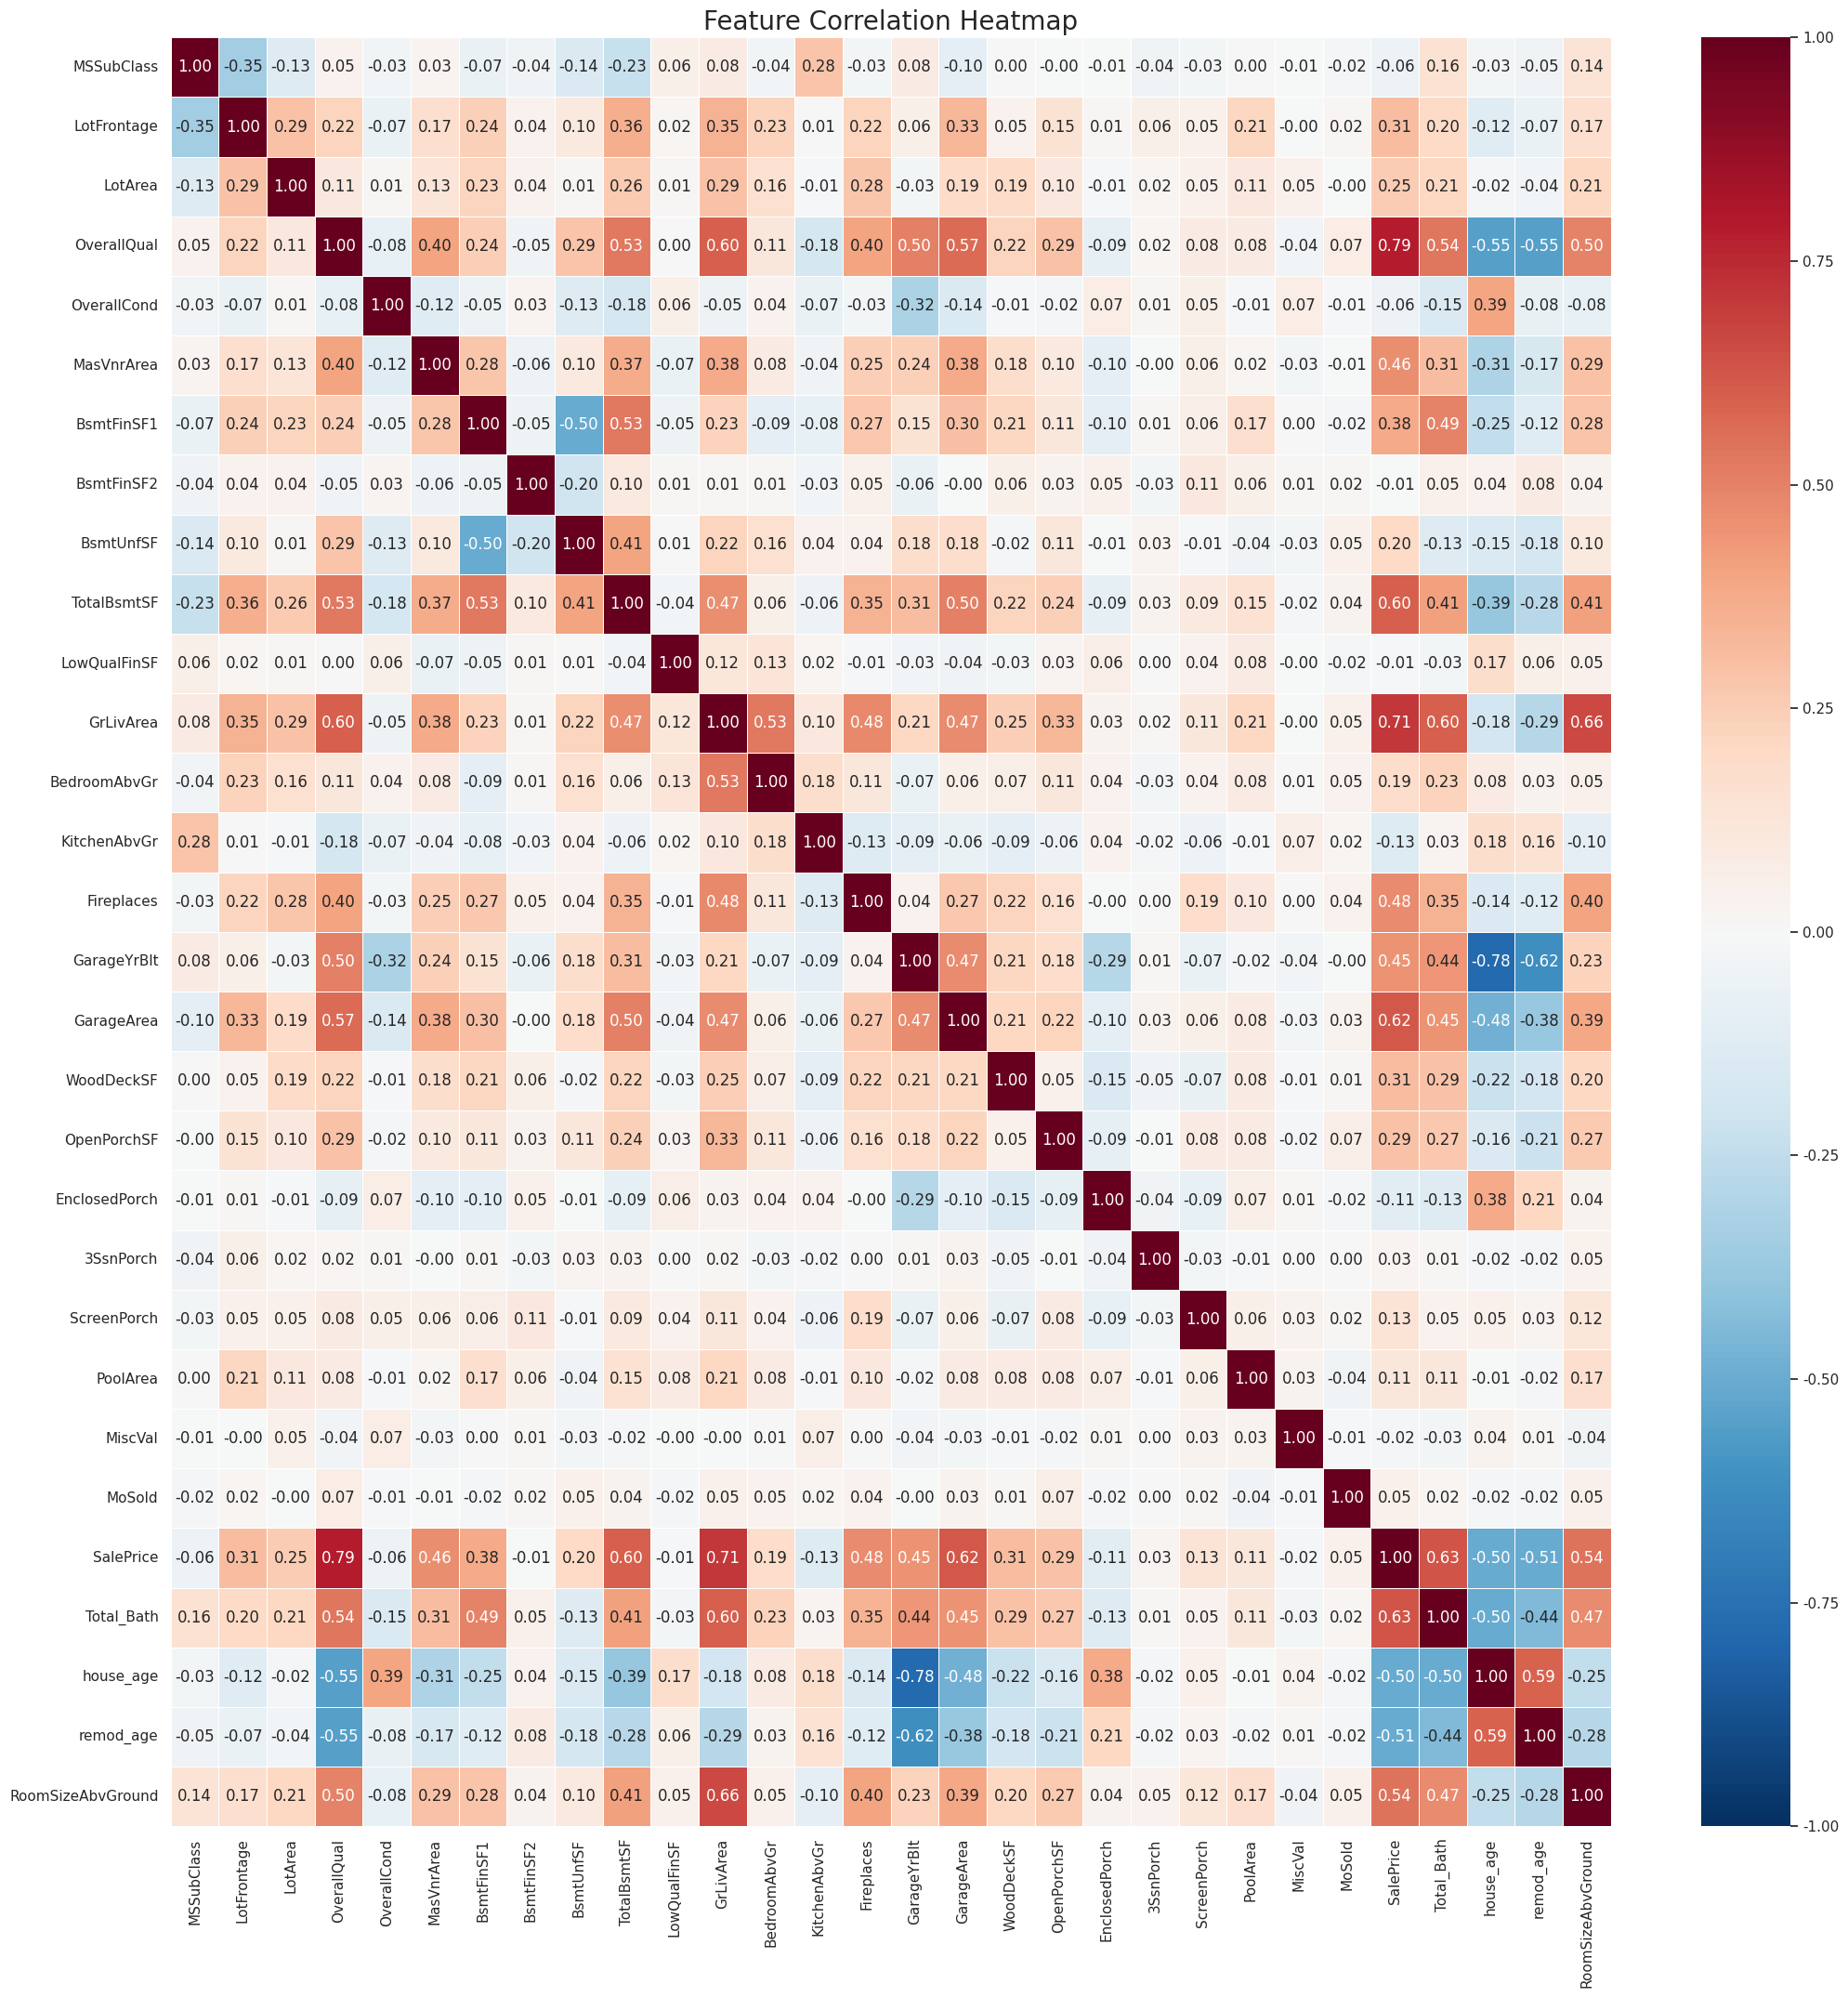

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 수치형 변수만 선택 (상관관계는 수치형 데이터만 계산 가능합니다)
numeric_train_df = train_df.select_dtypes(include=['number'])

# 2. 상관계수 행렬 계산
corr_matrix = numeric_train_df.corr()

# 3. 그래프 크기 설정
# 변수가 많으면 숫자가 겹쳐 보일 수 있으므로 크기를 넉넉하게 잡습니다.
plt.figure(figsize=(25, 25))

# 4. 히트맵 그리기
sns.heatmap(data=corr_matrix,
            annot=True,      # 칸 안에 숫자 표시
            fmt='.2f',       # 소수점 둘째 자리까지 표시
            cmap='RdBu_r',   # 색상 테마 (빨강: 양의 상관관계, 파랑: 음의 상관관계)
            vmin=-1, vmax=1, # 색상 범위를 -1에서 1로 고정
            linewidths=.5)   # 칸 사이 간격 구분선

plt.title('Feature Correlation Heatmap', fontsize=20)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# 1. 수치형 변수만 선택 (VIF는 수치형만 계산 가능)
# 타겟 변수(SalePrice)는 예측 대상이므로 제외해야 합니다!
numeric_features = train_df.select_dtypes(include=[np.number]).drop(['SalePrice'], axis=1, errors='ignore')

# 2. 결측치(NaN)와 무한대(inf) 처리
# VIF 계산식은 빈칸이나 무한대가 있으면 에러가 납니다.
numeric_features = numeric_features.replace([np.inf, -np.inf], np.nan).dropna()

# 3. VIF 계산 함수 정의
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns

    # 각 컬럼별로 VIF 계산
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i)
                       for i in range(len(dataframe.columns))]

    return vif_data.sort_values(by="VIF", ascending=False)

# 4. 결과 출력
vif_df = calculate_vif(numeric_features)
print(vif_df)

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


              Feature         VIF
7         TotalBsmtSF         inf
6           BsmtUnfSF         inf
5          BsmtFinSF2         inf
4          BsmtFinSF1         inf
13        GarageYrBlt  183.388646
27            Overall   84.359349
26  RoomSizeAbvGround   67.806547
9           GrLivArea   51.154878
11       KitchenAbvGr   32.126030
10       BedroomAbvGr   27.256398
23         Total_Bath   26.603001
1         LotFrontage   16.704523
14         GarageArea   11.105422
24          house_age    6.956028
22             MoSold    6.508973
25          remod_age    4.841877
0          MSSubClass    4.395635
2             LotArea    2.971755
12         Fireplaces    2.924661
15         WoodDeckSF    1.884170
3          MasVnrArea    1.856324
16        OpenPorchSF    1.772205
17      EnclosedPorch    1.444264
19        ScreenPorch    1.204462
20           PoolArea    1.134160
8        LowQualFinSF    1.096205
18          3SsnPorch    1.031286
21            MiscVal    1.029837


In [ ]:
# 다중공선성을 유발하는 '세부 내역' 변수들 삭제
cols_to_drop = [
    # 1. 지하실 세부 면적 (TotalBsmtSF가 이미 합계를 가짐)
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',

    # 2. 잡다한 면적 (GrLivArea에 포함되거나 의미 없음)
    'LowQualFinSF',

    # 3. 차고 연도 (YearBuilt와 중복)
    'GarageYrBlt'

]

# 실제로 삭제 수행
train_df = train_df.drop(columns=cols_to_drop, errors='ignore')


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# 1. 수치형 변수만 선택 (VIF는 수치형만 계산 가능)
# 타겟 변수(SalePrice)는 예측 대상이므로 제외해야 합니다!
numeric_features = train_df.select_dtypes(include=[np.number]).drop(['SalePrice'], axis=1, errors='ignore')

# 2. 결측치(NaN)와 무한대(inf) 처리
# VIF 계산식은 빈칸이나 무한대가 있으면 에러가 납니다.
numeric_features = numeric_features.replace([np.inf, -np.inf], np.nan).dropna()

# 3. VIF 계산 함수 정의
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns

    # 각 컬럼별로 VIF 계산
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i)
                       for i in range(len(dataframe.columns))]

    return vif_data.sort_values(by="VIF", ascending=False)

# 4. 결과 출력
vif_df = calculate_vif(numeric_features)
print(vif_df)

          Feature        VIF
21        Overall  37.670246
5       GrLivArea  31.295196
7    KitchenAbvGr  25.783399
6    BedroomAbvGr  21.759953
18     Total_Bath  19.048979
1     LotFrontage  15.868231
4     TotalBsmtSF  12.892043
9      GarageArea  11.039321
19      house_age   6.662280
17         MoSold   6.332964
0      MSSubClass   4.259483
20      remod_age   4.103759
2         LotArea   2.956148
8      Fireplaces   2.893929
10     WoodDeckSF   1.869130
3      MasVnrArea   1.801159
11    OpenPorchSF   1.766795
12  EnclosedPorch   1.420859
14    ScreenPorch   1.186002
15       PoolArea   1.112552
13      3SsnPorch   1.028343
16        MiscVal   1.024707


In [ ]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SaleType', 'SaleCondition', 'SalePrice', 'Total_Bath',
       'house_age', 'remod_age', 'RoomSizeAbvGround'],
      dtype='object')

In [ ]:
# 1. 공통 매핑 딕셔너리 정의 (없는 등급이 있어도 상관없음)
quality_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0  # 지하실 등이 없는 경우
}

# 2. 품질 관련 컬럼 리스트
qual_cols = ['ExterQual','ExterCond','BsmtCond', 'KitchenQual', 'HeatingQC',
             'BsmtQual', 'GarageQual', 'GarageCond'
                ]

# 3. 일괄 적용 (Ex가 없는 컬럼이라도 Gd는 4점으로 매핑됨)
for col in qual_cols:
    # 데이터에 존재하는 값만 매핑되고, 없는 값(Ex)은 그냥 무시됨
    train_df[col] = train_df[col].map(quality_map)

In [ ]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SaleType', 'SaleCondition', 'SalePrice', 'Total_Bath',
       'house_age', 'remod_age', 'RoomSizeAbvGround'],
      dtype='object')

# 이상치

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

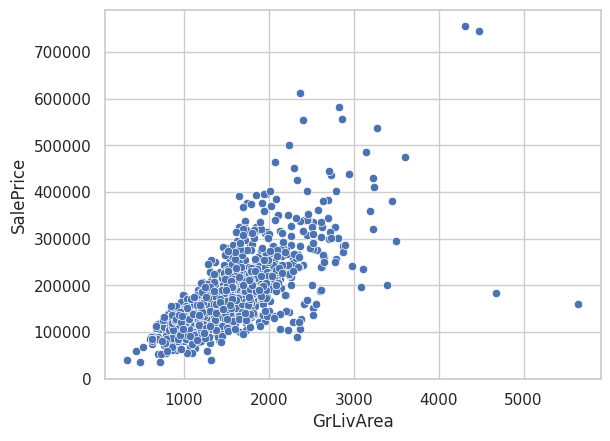

In [ ]:
sns.scatterplot(x = train_df['GrLivArea'], y= train_df['SalePrice'])

In [ ]:
outlier_index = train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<12.5)].index
print(outlier_index.values)
train_df.drop(outlier_index, axis=0, inplace=True)

[]


### 모델 설정 및 학습

<Axes: xlabel='SalePrice', ylabel='Count'>

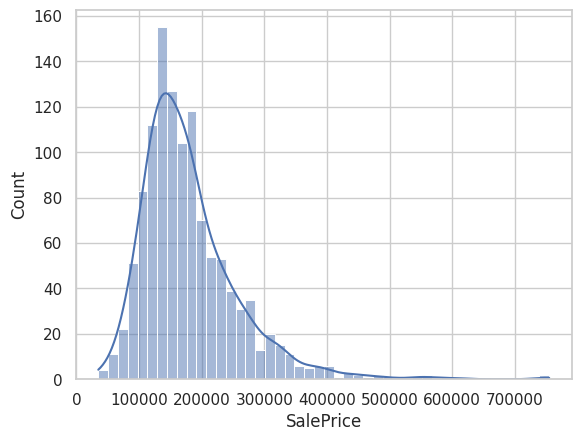

In [ ]:
sns.histplot(train_df['SalePrice'], kde=True)

In [ ]:
#SalePrice log 변환
original_SalePrice = train_df['SalePrice']
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# 릿지/랏소

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


# 원-핫 인코딩 (범주형 변수를 0과 1로 변환)
# drop_first=True: 다중공선성을 줄이기 위해 첫 번째 카테고리는 버립니다. (선형회귀에 중요!)
df_encoded = pd.get_dummies(train_df, drop_first=True)

# X(독립변수)와 y(종속변수) 분리
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']  # 이미 Log 변환된 상태

# ---------------------------------------------------------
# 2. Train / Validation 분리 (Hold-out Split)
# ---------------------------------------------------------
# 전체 데이터 중 20%는 나중에 최종 확인용(Val)으로 빼둡니다.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train Shape: {X_train.shape}, Val Shape: {X_val.shape}")


Train Shape: (934, 193), Val Shape: (234, 193)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error




# ---------------------------------------------------------
# 3. 모델 정의 및 K-Fold 교차검증 (CV)
# ---------------------------------------------------------
# K-Fold 설정 (3번 나누기, 섞어서 뽑기)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# 모델 선언 (알파값은 튜닝 대상이지만, 일반적인 시작값으로 설정했습니다)
# Lasso는 수렴 경고가 뜰 수 있어 max_iter를 넉넉히 줍니다.
ridge = Ridge(alpha=10.0)
lasso = Lasso(alpha=0.001, max_iter=3000)

models = {'Ridge': ridge, 'Lasso': lasso}

print("\n--- 3-Fold Cross Validation Results (RMSE) ---")

for name, model in models.items():
    # cross_val_score는 'neg_root_mean_squared_error'를 반환하므로 -1을 곱해줍니다.
    scores = cross_val_score(model, X_train, y_train, cv=kf,
                             scoring='neg_root_mean_squared_error')

    rmse_scores = -1 * scores
    avg_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)

    print(f"{name}: 평균 RMSE = {avg_rmse:.5f}  (표준편차: {std_rmse:.5f})")

# ---------------------------------------------------------
# 4. 최종 Validation Set 평가
# ---------------------------------------------------------
print("\n--- Final Validation Set Evaluation ---")

for name, model in models.items():
    # 전체 Train 셋으로 다시 학습
    model.fit(X_train, y_train)

    # Validation 셋 예측
    pred_val = model.predict(X_val)

    # RMSE 계산
    final_rmse = np.sqrt(mean_squared_error(y_val, pred_val))
    print(f"{name} RMSLE: {final_rmse:.5f}")

    # 2. 원래 가격으로 복원 (지수 변환)
    # np.expm1을 써서 로그를 벗겨냅니다.
    y_val_real = np.expm1(y_val)       # 원래 집값 (달러)
    pred_val_real = np.expm1(pred_val) # 예측 집값 (달러)

    # [B] 진짜 RMSE (실제 금액 오차)
    real_rmse = np.sqrt(mean_squared_error(y_val_real, pred_val_real))
    print(f"Real RMSE (Dollar Error): ${real_rmse:,.0f}")


--- 3-Fold Cross Validation Results (RMSE) ---
Ridge: 평균 RMSE = 0.15377  (표준편차: 0.02225)
Lasso: 평균 RMSE = 0.15998  (표준편차: 0.02702)

--- Final Validation Set Evaluation ---
Ridge RMSLE: 0.13283
Real RMSE (Dollar Error): $24,134
Lasso RMSLE: 0.12945
Real RMSE (Dollar Error): $23,862


하이퍼파라미터 튜닝 없이

릿지: 0.13443
랏소: 0.13155

하이퍼파라미터 튜닝

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score # KFold, cross_val_score 추가
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# 1. 스케일러 및 파이프라인 정의
scaler = RobustScaler()
ridge_pipe = Pipeline([('scaler', scaler), ('model', Ridge())])
lasso_pipe = Pipeline([('scaler', scaler), ('model', Lasso(max_iter=10000))])

alpha_range = np.logspace(-4, 1, 100)

models_to_tune = [
    # Ridge: 0.001 ~ 10
    ('Ridge', ridge_pipe, {'model__alpha': alpha_range}),

    # Lasso: 0.001 ~ 10
    ('Lasso', lasso_pipe, {'model__alpha': alpha_range})
]

# 시각화 준비
fig, axs = plt.subplots(figsize=(18, 8), nrows=1, ncols=2)
fig.tight_layout(pad=5)

print(f"탐색 범위: {alpha_range.min():.5f} ~ {alpha_range.max():.5f} (총 {len(alpha_range)}개 후보)\n")

for i, (name, pipe, params) in enumerate(models_to_tune):
    # ---------------------------------------------------------
    # [A] GridSearchCV로 튜닝 실행 (내부적으로 5-Fold 사용)
    # ---------------------------------------------------------
    grid = GridSearchCV(pipe, params, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_alpha = grid.best_params_['model__alpha']

    # ---------------------------------------------------------
    # [B] 범위 경계 체크
    # ---------------------------------------------------------
    is_hit_limit = (best_alpha == alpha_range.min()) or (best_alpha == alpha_range.max())
    warning_msg = "⚠️ 경고: 최적값이 범위 끝에 있습니다! 범위를 더 넓혀보세요." if is_hit_limit else "✅ 안정적인 범위 내에서 찾았습니다."

    # ---------------------------------------------------------
    # [C] 3-Fold 교차검증 (추가된 부분 ⭐)
    # ---------------------------------------------------------
    # 찾아낸 'best_model'로 다시 3번 검증해서 평균 점수를 냅니다.
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    # cross_val_score는 음수 MSE를 반환하므로 -1을 곱하고 sqrt를 씌워 RMSE로 변환
    cv_scores = cross_val_score(best_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=kf)
    avg_cv_rmse = -1 * cv_scores.mean()
    std_cv_rmse = cv_scores.std()

    # ---------------------------------------------------------
    # [D] 최종 결과 평가 (Validation Set)
    # ---------------------------------------------------------
    pred_log = best_model.predict(X_val)
    val_rmsle = np.sqrt(mean_squared_error(y_val, pred_log))

    print(f"========== {name} Tuning Result ==========")
    print(f"Best Alpha: {best_alpha:.5f}")
    print(f"Check Limit: {warning_msg}")
    print(f"3-Fold CV Average Score: {avg_cv_rmse:.5f} (± {std_cv_rmse:.5f})") # 3-Fold 결과 출력
    print(f"Hold-out Val Score: {val_rmsle:.5f}")
    print("-" * 40)

    # ---------------------------------------------------------
    # [E] 시각화 (상위/하위 10개)
    # ---------------------------------------------------------
    actual_model = best_model.named_steps['model']
    coef_series = pd.Series(actual_model.coef_, index=X_train.columns).sort_values(ascending=False)

    visual_coefs = pd.concat([coef_series.head(10), coef_series.tail(10)])

    sns.barplot(x=visual_coefs.values, y=visual_coefs.index, ax=axs[i], palette='coolwarm')
    axs[i].set_title(f'{name} (Alpha={best_alpha:.4f}) Top/Bottom 10 Coefs')

plt.show()

<하이퍼파라미터 튜닝 후>
여러번 시도해봤는데 오히려 자꾸 성능이 떨어져서 그냥 기본 하이퍼파라미터를 쓰겠음.

# XGBM

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. 모델 정의 (기본 설정)
# random_state: 재현성을 위해 고정
# n_estimators: 나무의 개수 (너무 적으면 학습이 안 되므로 적당히 1000개 설정)
# learning_rate: 학습률 (보통 0.01 ~ 0.1 사이 사용, 기본값 0.05 설정)
# n_jobs: 병렬 처리 (-1은 모든 CPU 코어 사용)
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=50, n_jobs=-1, random_state=42)

# 2. 모델 학습
# early_stopping_rounds: 더 이상 성능이 좋아지지 않으면 50번 돌고 멈춤 (과적합 방지)
# eval_set: 검증 데이터를 넣어주면 학습 과정에서 성능을 체크함
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False  # True로 하면 학습 과정을 쭉 출력함
)

# 3. 예측 및 평가
pred_log = xgb_model.predict(X_val)

# y가 이미 로그 변환되어 있으므로, RMSE 계산 = RMSLE
rmsle = np.sqrt(mean_squared_error(y_val, pred_log))

# 4. 결과 출력
print(f"XGBoost Baseline RMSLE: {rmsle:.5f}")

# (선택) Feature Importance 시각화
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax, max_num_features=20, height=0.6)
plt.title("XGBoost Feature Importance (Top 20)")
plt.show()

하이퍼파라미터 튜닝 전:
XGBoost Baseline RMSLE: 0.12664

튜닝 시작... (잠시만 기다려주세요)
100%|██████████| 50/50 [01:36<00:00,  1.93s/trial, best loss: 0.13806743997417442]

Best Params Found:
{'colsample_bytree': np.float64(0.7031120397308626), 'gamma': np.float64(0.006343548279818662), 'learning_rate': np.float64(0.053712307031798905), 'max_depth': np.float64(7.0), 'min_child_weight': np.float64(7.0), 'n_estimators': np.float64(450.0), 'subsample': np.float64(0.5110744623780178)}



최종 검증 RMSLE: 0.11755


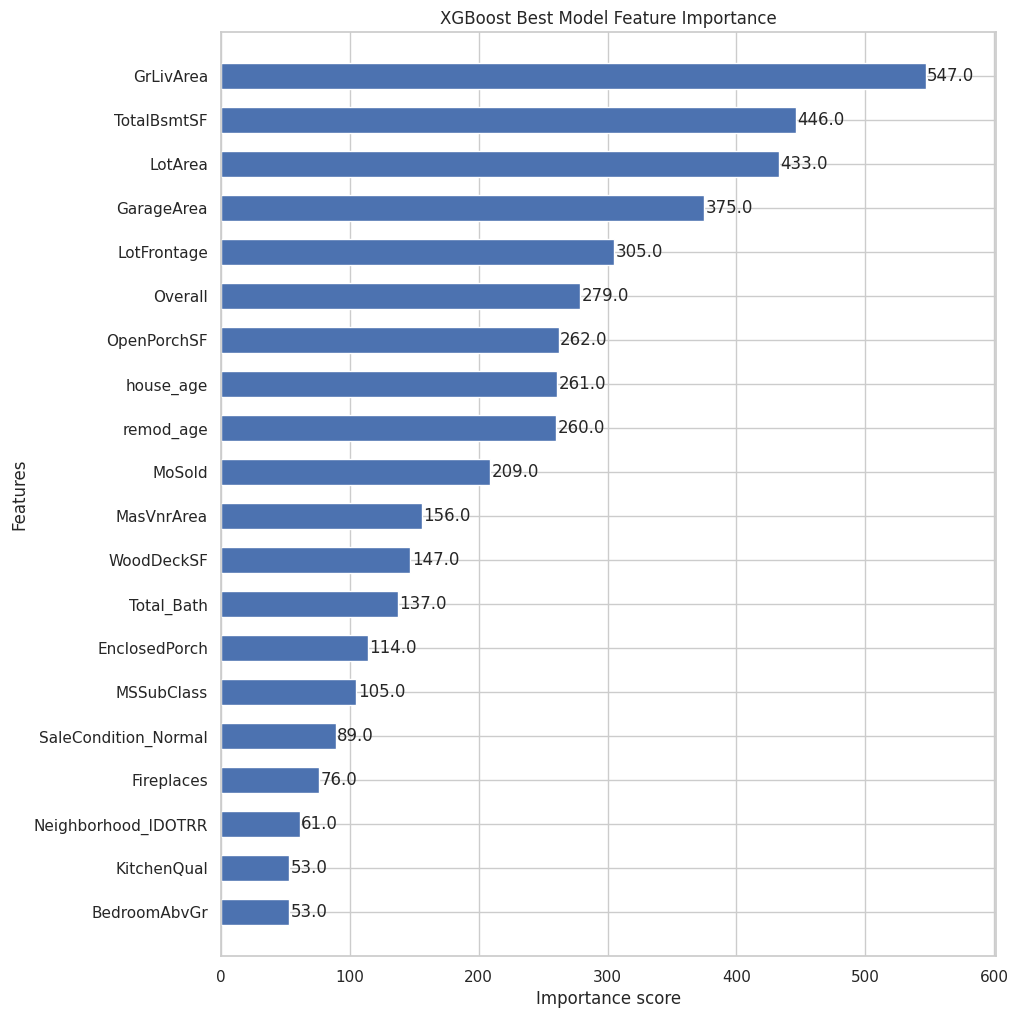

In [ ]:
import numpy as np
import pandas as pd
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from xgboost import plot_importance

# 1. 탐색할 파라미터 공간(Search Space) 정의
# Hyperopt는 이 범위 안에서 확률적으로 좋은 값을 찾아냅니다.
xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),        # 나무의 깊이 (정수)
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2), # 학습률
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 50), # 나무 개수
    'min_child_weight': hp.quniform('min_child_weight', 1, 7, 1), # 관측치 최소 무게
    'subsample': hp.uniform('subsample', 0.5, 1.0),         # 데이터 샘플링 비율
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0), # 컬럼 샘플링 비율
    'gamma': hp.uniform('gamma', 0, 0.5),                   # 리프 노드 분할을 위한 최소 손실 감소
    'seed': 42
}

# 2. 목적 함수(Objective Function) 정의
# Hyperopt가 던져준 파라미터(params)를 받아서 3-Fold CV 점수(RMSE)를 반환합니다.
def objective_func(params):
    # int형 파라미터는 강제로 형변환을 해줘야 합니다 (Hyperopt는 float로 줌)
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    params['min_child_weight'] = int(params['min_child_weight'])

    # 모델 정의
    model = XGBRegressor(n_jobs=-1, **params)

    # 3-Fold CV 수행
    # neg_root_mean_squared_error를 사용하므로 -1을 곱해 양수로 만듭니다.
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=kf)

    # 평균 RMSE 반환 (Hyperopt는 이 값을 최소화하려고 노력함)
    avg_rmse = -1 * np.mean(score)

    return {'loss': avg_rmse, 'status': STATUS_OK}

# 3. 최적화 실행 (fmin)
# max_evals=50: 50번 시도해서 최적값을 찾음 (시간 없으면 30, 여유 있으면 100)
trials = Trials()

print("튜닝 시작... (잠시만 기다려주세요)")
best_params = fmin(fn=objective_func,
                   space=xgb_search_space,
                   algo=tpe.suggest,
                   max_evals=50,
                   trials=trials,
                   rstate=np.random.default_rng(42))

print("\nBest Params Found:")
print(best_params)

# 4. 최적 파라미터로 최종 모델 학습 및 평가
# best_params에는 float로 된 값들이 들어있어서 다시 int로 바꿔줘야 합니다.
final_params = best_params.copy()
final_params['max_depth'] = int(final_params['max_depth'])
final_params['n_estimators'] = int(final_params['n_estimators'])
final_params['min_child_weight'] = int(final_params['min_child_weight'])
final_params['seed'] = 42

xgb_best = XGBRegressor(n_jobs=-1, **final_params)
xgb_best.fit(X_train, y_train)

# 검증 데이터 예측
pred_log = xgb_best.predict(X_val)
val_rmsle = np.sqrt(mean_squared_error(y_val, pred_log))

print(f"\n최종 검증 RMSLE: {val_rmsle:.5f}")

# 5. Feature Importance 시각화
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_best, ax=ax, max_num_features=20, height=0.6, title='XGBoost Best Model Feature Importance')
plt.show()

하이퍼파라미터 튜닝 후:

최종 검증 RMSLE: 0.126411

# LightGBM

In [ ]:
from lightgbm import LGBMRegressor, plot_importance
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. 모델 정의 (기본 설정)
# n_jobs=-1: 모든 CPU 코어 사용 (속도 향상)
# random_state=42: 결과 재현성 고정
lgbm_baseline = LGBMRegressor(random_state=42, n_jobs=-1)

# 2. 3-Fold 교차검증 설정
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# 3. 교차검증 수행 (Training Data 전체에 대해 평가)
# scoring='neg_root_mean_squared_error': 사이킷런은 에러를 음수로 반환하므로 -1을 곱해줍니다.
cv_scores = cross_val_score(lgbm_baseline, X_train, y_train,
                            scoring='neg_root_mean_squared_error', cv=kf)

# 음수 값을 양수로 변환 (RMSE)
rmsle_scores = -1 * cv_scores
avg_rmsle = np.mean(rmsle_scores)
std_rmsle = np.std(rmsle_scores)

print(f"=== LightGBM Baseline (3-Fold CV) ===")
print(f"Fold별 RMSLE: {rmsle_scores}")
print(f"평균 RMSLE: {avg_rmsle:.5f} (± {std_rmsle:.5f})")

# 4. 검증(Validation) 데이터 최종 평가 (Hold-out)
# 전체 Train 데이터로 학습 후 Val 데이터 예측
lgbm_baseline.fit(X_train, y_train)
pred_log = lgbm_baseline.predict(X_val)

# 최종 Validation RMSLE 계산
val_rmsle = np.sqrt(mean_squared_error(y_val, pred_log))
print(f"최종 Validation RMSLE: {val_rmsle:.5f}")

# 5. Feature Importance 시각화
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_baseline, ax=ax, max_num_features=20, height=0.6, title='LightGBM Feature Importance')
plt.show()

하이퍼파라미터 튜닝 없이:
0.14959

In [ ]:
import numpy as np
import pandas as pd
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# ---------------------------------------------------------
# 1. 탐색 공간 최적화 (범위를 좁혀서 속도 향상)
# ---------------------------------------------------------
lgbm_fast_search_space = {
    # Ames 데이터는 작아서 잎(leaves)이 많으면 오히려 과적합됨 + 속도 느려짐
    # 20~150 -> 15~50으로 대폭 축소
    'num_leaves': hp.quniform('num_leaves', 15, 50, 1),

    # 깊이도 너무 깊게 안 들어가도 됨
    'max_depth': hp.quniform('max_depth', 3, 10, 1),

    # 학습률은 0.01보다 0.05 근처가 빠르고 성능 비슷할 수 있음
    'learning_rate': hp.uniform('learning_rate', 0.03, 0.2),

    # 나무 개수: 2000개는 너무 많음 -> 최대 1000개로 제한
    'n_estimators': hp.quniform('n_estimators', 300, 1000, 50),

    'min_child_samples': hp.quniform('min_child_samples', 10, 50, 5),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'random_state': 42
}

# ---------------------------------------------------------
# 2. 목적 함수 (동일)
# ---------------------------------------------------------
def objective_func(params):
    params['num_leaves'] = int(params['num_leaves'])
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    params['min_child_samples'] = int(params['min_child_samples'])

    # n_jobs=-1 필수 (모든 CPU 코어 사용)
    model = LGBMRegressor(n_jobs=-1, verbose=-1, **params)

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=kf)

    return {'loss': -1 * np.mean(score), 'status': STATUS_OK}

# ---------------------------------------------------------
# 3. 최적화 실행 (횟수 줄이기)
# ---------------------------------------------------------
trials = Trials()

print("🚀 빠른 튜닝 시작 (Max Evals=30)...")
best_params = fmin(fn=objective_func,
                   space=lgbm_fast_search_space,
                   algo=tpe.suggest,
                   max_evals=30,  # 50번 -> 30번으로 줄임 (충분함)
                   trials=trials,
                   rstate=np.random.default_rng(42))

print("\nBest Params Found:")
print(best_params)

# ---------------------------------------------------------
# 4. 결과 확인
# ---------------------------------------------------------
l_params = best_params.copy()
for k in ['num_leaves', 'max_depth', 'n_estimators', 'min_child_samples']:
    l_params[k] = int(l_params[k])
l_params['random_state'] = 42

lgbm_best = LGBMRegressor(n_jobs=-1, **l_params)
lgbm_best.fit(X_train, y_train)
pred_log = lgbm_best.predict(X_val)
val_rmsle = np.sqrt(mean_squared_error(y_val, pred_log))

print(f"\n최종 검증 RMSLE: {val_rmsle:.5f}")

🚀 빠른 튜닝 시작 (Max Evals=30)...
100%|██████████| 30/30 [00:44<00:00,  1.48s/trial, best loss: 0.14135057685812016]

Best Params Found:
{'colsample_bytree': np.float64(0.612504793533828), 'learning_rate': np.float64(0.031930875227094535), 'max_depth': np.float64(3.0), 'min_child_samples': np.float64(10.0), 'n_estimators': np.float64(450.0), 'num_leaves': np.float64(29.0), 'subsample': np.float64(0.7717502182952922)}

최종 검증 RMSLE: 0.11632


하이퍼파라미터 튜닝 후:
0.12571

# 모델 스태킹

In [ ]:
train_df.head()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# ---------------------------------------------------------
# 1. 베이스 모델 (Level 0) 정의
# ---------------------------------------------------------

# (1) Ridge: alpha=10.0 (스케일러 필수)
# 스태킹 내부에서도 스케일링이 적용되도록 파이프라인으로 묶습니다.
ridge_base = make_pipeline(RobustScaler(), Ridge(alpha=10.0))

# (2) Lasso: alpha=0.001 (스케일러 필수)
lasso_base = make_pipeline(RobustScaler(), Lasso(alpha=0.001, max_iter=3000))

# (3) XGBoost: 최적 파라미터 (final_params) 사용
# 주의: 스태킹 내부에서는 early_stopping을 쓸 수 없으므로, 튜닝된 n_estimators를 그대로 씁니다.
xgb_base = XGBRegressor(n_jobs=-1, **final_params)

# (4) LightGBM: 최적 파라미터 (l_params) 사용
lgbm_base = LGBMRegressor(n_jobs=-1, verbose=-1, **l_params)

# 모델 목록 생성
estimators = [
    ('ridge', ridge_base),
    ('lasso', lasso_base),
    ('xgb', xgb_base),
    ('lgbm', lgbm_base)
]

# ---------------------------------------------------------
# 2. 메타 모델 (Level 1) 정의
# ---------------------------------------------------------
# 요청하신 대로 Lasso를 메타 모델로 사용합니다.
# 메타 모델은 입력값이 "예측값들"이라서 스케일링이 크게 필요 없지만,
# Lasso 특성상 값의 크기에 민감하므로 안전하게 별도로 정의합니다.
meta_model = Lasso(alpha=0.001)  # 메타 모델용 파라미터 (조정 가능)

# ---------------------------------------------------------
# 3. 스태킹 모델 구성 (cv=3)
# ---------------------------------------------------------
# cv=3: 내부적으로 3-Fold를 돌려 OOF(Out-Of-Fold) 예측값을 만듭니다.
# n_jobs=-1: 병렬 처리로 속도 향상
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_model,
    cv=3,
    n_jobs=-1,
    passthrough=False # True로 하면 원본 데이터도 같이 메타 모델에 넣어줍니다 (보통 False)
)

# ---------------------------------------------------------
# 4. 학습 및 평가
# ---------------------------------------------------------
print("스태킹 모델 학습 중... (시간이 조금 걸립니다)")

# 전체 학습 데이터로 스태킹 학습
stacking_model.fit(X_train, y_train)

# 검증 데이터 예측
pred_log = stacking_model.predict(X_val)

# RMSLE 계산 (y가 이미 로그 변환됨)
val_rmsle = np.sqrt(mean_squared_error(y_val, pred_log))

print(f"\n🔥 최종 스태킹(Stacking) RMSLE: {val_rmsle:.5f}")

# ---------------------------------------------------------
# (보너스) 어떤 모델을 믿었는지 확인 (회귀 계수)
# ---------------------------------------------------------
# 메타 모델(Lasso)이 4개의 모델 중 누구의 의견을 많이 반영했는지 봅니다.
meta_coef = pd.Series(
    stacking_model.final_estimator_.coef_,
    index=[name for name, _ in estimators]
)
print("\n[메타 모델의 가중치 선택]")
print(meta_coef.sort_values(ascending=False))

스태킹 모델 학습 중... (시간이 조금 걸립니다)

🔥 최종 스태킹(Stacking) RMSLE: 0.11478

[메타 모델의 가중치 선택]
xgb      0.539837
lgbm     0.291990
ridge    0.186923
lasso    0.000000
dtype: float64


In [ ]:
# 동일한 전처리
test_df = test_df.fillna(test_df.median(numeric_only=True))
for col in test_df.select_dtypes(include="object"):
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])
test_ids = test_df['Id']

# ---------------------------------------------------------
# [Test 데이터 전처리] Train과 동일하게 맞추기
# ---------------------------------------------------------

# 1. 불필요한 컬럼 제거 (Train과 동일)
# 주의: SalePrice는 test에 없으므로 삭제 목록에 포함 안 해도 됨
cols_to_drop_init = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'MasVnrType']
test_df.drop(columns=cols_to_drop_init, errors='ignore', inplace=True)

# 2. 결측치 채우기
# (엄밀히 말하면 train의 median/mode 값을 가져와서 채우는 게 정석이지만,
#  간단하게 test 자체의 median/mode로 채워도 베이스라인으론 괜찮습니다.)
test_df = test_df.fillna(test_df.median(numeric_only=True))

for col in test_df.select_dtypes(include="object"):
    # test 데이터에만 있는 새로운 결측치가 있을 수 있으므로 처리
    if len(test_df[col].mode()) > 0:
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])
    else:
        test_df[col] = test_df[col].fillna("None") # 최빈값이 없을 경우 대비

# 3. 파생 변수 생성 (Train과 공식 100% 일치해야 함)
# (1) 면적 관련
test_df.drop(['1stFlrSF', '2ndFlrSF'], axis=1, errors='ignore', inplace=True)

# (2) 욕실 합치기
test_df['Total_Bath'] = (test_df['FullBath'] + test_df['BsmtFullBath'] +
                         0.5 * (test_df['HalfBath'] + test_df['BsmtHalfBath']))
cols_to_drop_bath = ['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath']
test_df.drop(columns=cols_to_drop_bath, errors='ignore', inplace=True)

# (3) 연도 관련 (Age)
test_df['house_age'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['remod_age'] = test_df['YrSold'] - test_df['YearRemodAdd']
test_df.drop(['YrSold', 'YearBuilt', 'YearRemodAdd'], axis=1, errors='ignore', inplace=True)

# (4) 차고
test_df.drop('GarageCars', axis=1, errors='ignore', inplace=True)


test_df.drop('TotRmsAbvGrd', axis=1, errors='ignore', inplace=True)

# 4. 다중공선성 변수 삭제
cols_to_drop_multi = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'LowQualFinSF',
    'GarageYrBlt'
]
test_df.drop(columns=cols_to_drop_multi, errors='ignore', inplace=True)

#일부 명목 변수 수치화
# 1. 공통 매핑 딕셔너리 정의 (없는 등급이 있어도 상관없음)
quality_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0  # 지하실 등이 없는 경우
}

# 2. 품질 관련 컬럼 리스트
qual_cols = ['ExterQual','ExterCond','BsmtCond', 'KitchenQual', 'HeatingQC',
             'BsmtQual', 'GarageQual', 'GarageCond'
                ]

# 3. 일괄 적용 (Ex가 없는 컬럼이라도 Gd는 4점으로 매핑됨)
for col in qual_cols:
    # 데이터에 존재하는 값만 매핑되고, 없는 값(Ex)은 그냥 무시됨
    test_df[col] = test_df[col].map(quality_map)

# train_df에 적용
test_df['SaleType'] = test_df['SaleType'].apply(simplify_sale_type)

test_df['Overall'] = test_df['OverallQual'] + test_df['OverallCond']
test_df.drop(['OverallQual', 'OverallCond'], axis=1, inplace=True)




KeyError: 'Id'

In [ ]:
from scipy.stats import skew

# 1. 수치형 변수만 골라내기
numeric_feats = train_df.dtypes[train_df.dtypes != "object"].index

# 2. 왜도 0.75 이상인 변수 찾기
skewed_feats = train_df[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_cols = skewed_feats.index

print(f"로그 변환할 변수 {len(skewed_cols)}개 발견! 변환 중...")

# 3. [핵심] Train과 Test 모두 로그 변환 (np.log1p)
train_df[skewed_cols] = np.log1p(train_df[skewed_cols])
test_df[skewed_cols] = np.log1p(test_df[skewed_cols])

print("✅ 왜곡된 변수들 펴주기 완료!")

로그 변환할 변수 16개 발견! 변환 중...
✅ 왜곡된 변수들 펴주기 완료!


In [ ]:
#원핫인코딩
test_df = pd.get_dummies(test_df, drop_first=True)


# train/test 컬럼 차이 맞추기
test_df = test_df.reindex(columns=X.columns, fill_value=0)

# 예측
test_pred = stacking_model.predict(test_df)
pred_real = np.expm1(test_pred)

In [ ]:
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": pred_real
})
submission.to_csv("../drive/MyDrive/aiffel_bootcamp/house_price/submission12.csv", index=False)